In [1]:
import numpy as np
import glob
import os
%matplotlib inline
from readTRC import readTrc
import matplotlib.pyplot as plt


In [18]:
def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    return array[idx]

def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

In [24]:
SPATH = '/Users/austinmcdonald/Desktop/XeHe/Data/098/'
PATH = '/Users/austinmcdonald/Desktop/XeHe/098/'
folders = glob.glob(PATH+"*/")
folders.sort()
folders

['/Users/austinmcdonald/Desktop/XeHe/098/Xe-098_P-06_E-060/',
 '/Users/austinmcdonald/Desktop/XeHe/098/Xe-098_P-06_E-080/',
 '/Users/austinmcdonald/Desktop/XeHe/098/Xe-098_P-06_E-100/',
 '/Users/austinmcdonald/Desktop/XeHe/098/Xe-098_P-06_E-150/',
 '/Users/austinmcdonald/Desktop/XeHe/098/Xe-098_P-06_E-200/',
 '/Users/austinmcdonald/Desktop/XeHe/098/Xe-098_P-06_E-250/',
 '/Users/austinmcdonald/Desktop/XeHe/098/Xe-098_P-06_E-300/',
 '/Users/austinmcdonald/Desktop/XeHe/098/Xe-098_P-10_E-080/',
 '/Users/austinmcdonald/Desktop/XeHe/098/Xe-098_P-10_E-100/',
 '/Users/austinmcdonald/Desktop/XeHe/098/Xe-098_P-10_E-150/',
 '/Users/austinmcdonald/Desktop/XeHe/098/Xe-098_P-10_E-200/',
 '/Users/austinmcdonald/Desktop/XeHe/098/Xe-098_P-10_E-250/',
 '/Users/austinmcdonald/Desktop/XeHe/098/Xe-098_P-10_E-300/',
 '/Users/austinmcdonald/Desktop/XeHe/098/Xe-098_P-10_E-350/']

In [25]:
len(folders)

14

In [26]:
folders[AH].split('/')[-2]

NameError: name 'AH' is not defined

In [27]:
#folders[27]

In [28]:
for F in range(0,len(folders)):
    #print(folders[F])
    NAME = folders[F].split('/')[-2]
    files = os.listdir(folders[F])
    
    FilesGold   = []
    FilesSignal = []

    for x in range(0,len(files)):
        if int(files[x][1]) ==4 or int(files[x][1]) ==2:
            FilesGold.append(files[x])
        if int(files[x][1]) ==3 or int(files[x][1]) ==1:
            FilesSignal.append(files[x])
            
    X, Y, info = readTrc(folders[F]+FilesSignal[0])

    Yvals = np.zeros(X.shape[0])
    Xvals = np.zeros(Y.shape[0])
    avg = 0
    #for w in range(0,1100):
    for w in range(0,len(FilesSignal)):

        X, Y, info = readTrc(folders[F]+FilesSignal[w])
        if Y.shape[0]==Yvals.shape[0] and X.shape[0]==Xvals.shape[0]:
            Yvals += Y
            Xvals += X
            avg   += 1
    SigY = Yvals/avg
    SigX = Xvals/avg

    X, Y, info = readTrc(folders[F]+FilesGold[0])

    Yvals = np.zeros(X.shape[0])
    Xvals = np.zeros(Y.shape[0])
    avg = 0
    #for w in range(0,1100):
    for w in range(0,len(FilesGold)):
        X, Y, info = readTrc(folders[F]+FilesGold[w])
        if Y.shape[0]==Yvals.shape[0] and X.shape[0]==Xvals.shape[0]:
            Yvals += Y
            Xvals += X
            avg   += 1
    GolY = Yvals/avg
    GolX = Xvals/avg


    TriggerTime = find_nearest(SigX,0)
    Trigger     = np.where(SigX==TriggerTime)[0][0]
    baselineS    = np.mean(SigY[0:Trigger])
    baselineG    = np.mean(GolY[0:Trigger])
    data = [(GolX), GolY-baselineG, SigY-baselineS]
    np.savetxt(SPATH+NAME+'.txt',data)
    #print("DONE!")

TypeError: Mismatch between array dtype ('object') and format specifier ('%.18e')

In [89]:
GolX

array([-0.0001999, -0.0001997, -0.0001995, ...,  0.0017999,  0.0018001,
        0.0018003])

In [59]:
SPATH

'/Users/austinmcdonald/Desktop/Xenon/Data/'

In [5]:
AH = 3
files = os.listdir(folders[AH])
len(files)

200

In [6]:
FilesGold   = []
FilesSignal = []

for x in range(0,len(files)):
    if int(files[x][1]) ==4 or int(files[x][1]) ==2:
        FilesGold.append(files[x])
    if int(files[x][1]) ==3 or int(files[x][1]) ==1:
        FilesSignal.append(files[x])

In [8]:
X, Y, info = readTrc(folders[AH]+FilesSignal[0])

Yvals = np.zeros(X.shape[0])
Xvals = np.zeros(Y.shape[0])
avg = 0
#for w in range(0,1100):
for w in range(0,len(FilesSignal)):

    X, Y, info = readTrc(folders[AH]+FilesSignal[w])
    if Y.shape[0]==Yvals.shape[0] and X.shape[0]==Xvals.shape[0]:
        Yvals += Y
        Xvals += X
        avg   += 1
SigY = Yvals/avg
SigX = Xvals/avg

X, Y, info = readTrc(folders[AH]+FilesGold[0])

Yvals = np.zeros(X.shape[0])
Xvals = np.zeros(Y.shape[0])
avg = 0
#for w in range(0,1100):
for w in range(0,len(FilesGold)):
    X, Y, info = readTrc(folders[AH]+FilesGold[w])
    if Y.shape[0]==Yvals.shape[0] and X.shape[0]==Xvals.shape[0]:
        Yvals += Y
        Xvals += X
        avg   += 1
GolY = Yvals/avg
GolX = Xvals/avg

In [17]:
TriggerTime = find_nearest(SigX,0)
Trigger     = np.where(SigX==TriggerTime)[0][0]
baselineS    = np.mean(SigY[0:Trigger])
baselineG    = np.mean(GolY[0:Trigger])
data = [GolX, GolY-baselineG, SigY-baselineS]
np.savetxt(PATH+"test"+'.txt',data)

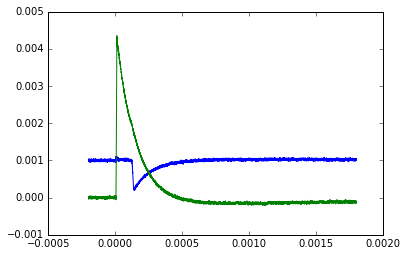

In [21]:
plt.plot(GolX,SigY-baselineS+0.001)
plt.plot(GolX,GolY-baselineG)

In [5]:
AH = 3
Fold = folders[AH].split('/')[-2]
cut = Fold+'/'



files = os.listdir(folders[AH])
#files.remove('.DS_Store')
int(files[4][1])

4

In [6]:
Fold

'250'

In [8]:
FilesGold   = []
FilesSignal = []

for x in range(0,len(files)):
    if int(files[x][1]) ==4 or int(files[x][1]) ==2:
        FilesGold.append(files[x])
    if int(files[x][1]) ==3 or int(files[x][1]) ==1:
        FilesSignal.append(files[x])

In [9]:
X, Y, info = readTrc(folders[AH]+FilesSignal[0])

Yvals = np.zeros(X.shape[0])
Xvals = np.zeros(Y.shape[0])
avg = 0
#for w in range(0,1100):
for w in range(0,len(FilesSignal)):

    X, Y, info = readTrc(folders[AH]+FilesSignal[w])
    if Y.shape[0]==Yvals.shape[0] and X.shape[0]==Xvals.shape[0]:
        Yvals += Y
        Xvals += X
        avg   += 1
SigY = Yvals/avg
SigX = Xvals/avg

In [10]:
avg

93

In [11]:
TriggerTime = find_nearest(SigX,0)
Trigger     = np.where(SigX==TriggerTime)[0][0]
baseline    = np.mean(SigY[0:Trigger])
data = [SigX,SigY-baseline]
np.savetxt('/Users/austinmcdonald/Desktop/Xenon-11bar-test/'+"Sig-"+Fold+'.txt',data)

In [12]:
X, Y, info = readTrc(folders[AH]+FilesGold[1])

Yvals = np.zeros(X.shape[0])
Xvals = np.zeros(Y.shape[0])
avg = 0
#for w in range(0,1100):
for w in range(0,len(FilesGold)):
    X, Y, info = readTrc(folders[AH]+FilesGold[w])
    if Y.shape[0]==Yvals.shape[0] and X.shape[0]==Xvals.shape[0]:
        Yvals += Y
        Xvals += X
        avg   += 1
GolY = Yvals/avg
GolX = Xvals/avg

In [13]:
avg

93

In [14]:
TriggerTime = find_nearest(GolX,0)
Trigger     = np.where(GolX==TriggerTime)[0][0]
baseline    = np.mean(GolY[0:Trigger])
data = [GolX,GolY-baseline]
np.savetxt('/Users/austinmcdonald/Desktop/Xenon-11bar-test/'+"Gol-"+Fold+'.txt',data)

In [44]:
for q in range(3,4):
    files = os.listdir(folders[q])
    Name = folders[q].split('/')[-2]
    N = len(files)
    
    X, Y, info = readTrc(folders[q]+files[0])
    
    Yvals = np.zeros(X.shape[0])
    Xvals = np.zeros(Y.shape[0])
    avg = 0
    for w in range(0,N):
        X, Y, info = readTrc(folders[q]+files[w])
        if Y.shape[0]==Yvals.shape[0] and X.shape[0]==Xvals.shape[0]:
            Yvals += Y
            Xvals += X
            avg   += 1
    Yvals = Yvals/avg
    Xvals = Xvals/avg
    TriggerTime = find_nearest(Xvals,0)
    Trigger     = np.where(Xvals==TriggerTime)[0][0]
    baseline    = np.mean(Yvals[0:Trigger])
    data = [Xvals,Yvals-baseline]
    np.savetxt(PATH+Name+'.txt',data)
    
    

In [26]:
Yvals

array([ 0.01477493,  0.01506118,  0.01478548, ...,  0.01492791,
        0.01496623,  0.01486933])

In [ ]:
files = os.listdir()
#files.remove('.DS_Store')


In [ ]:
len(files)

In [ ]:
N = len(files)
Yvals = np.zeros(50e3+2)
Xvals = np.zeros(50e3+2)

for q in range(0,N):
    X, Y, info = readTrc(files[q])
    #Y = np.array(Y)
    Yvals += Y
    Xvals +=X
Yvals = Yvals/N
Xvals = Xvals/N

In [ ]:
find_nearest(Xvals,0)

In [ ]:
TriggerTime = find_nearest(Xvals,0)
Trigger     = np.where(Xvals==TriggerTime)[0][0]
baseline    = np.mean(Yvals[0:Trigger])
baseline

In [ ]:
plt.plot(Xvals,Yvals-baseline)

In [ ]:
data = [Xvals,Yvals-baseline]

In [ ]:
path = '/Users/austinmcdonald/Desktop/data/Ion-stuff/Ion mobilitys/Argon/090418-cleaned-2bar/'
np.savetxt(path+'050-clean.txt',data)

In [ ]:
AA = np.loadtxt(path+'200clean.txt')
